In [ ]:
import sys

# Legger til filsti sånn at bibliotekene og funksjonsfila blir funnet
src_path = '..\\src'
src_path_2 = '..\\venv\\Lib\\site-packages'

if src_path not in sys.path:
    sys.path.insert(0, src_path)

if src_path_2 not in sys.path:
    sys.path.insert(0, src_path_2)

# Importerer bibliotek
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Importerer fila med funksjonene våre
import functions as fc

## Laste inn og forbedre dataen

In [4]:
# Laster inn de rensede datasettene og gir de navn
temperature = pd.read_csv('../data/clean_temperature.csv')

wind = pd.read_csv('../data/clean_wind.csv')

precipitation = pd.read_csv('../data/clean_precipitation.csv')

In [5]:
# Gjør referansetid om til datatype datetime
date_temp = fc.make_datetime(temperature)

date_prec = fc.make_datetime(precipitation)

date_wind = fc.make_datetime(wind)

referansetid er gjort om til DateTime
referansetid er gjort om til DateTime
referansetid er gjort om til DateTime


## Hypotese
Vår hypotese er at når det er mye nedbør er det også mye vind. Og at ved mindre vind og nedbør er det høy temperatur.

#### Mye nedbør = mye vind
Får å teste hypotesen har vi valgt å finne det månedlige gjennomsnittet. Dette gjør grafene mer oversiktlig.

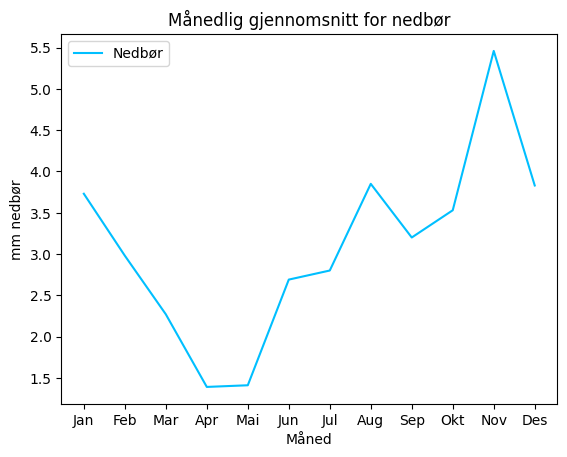

In [ ]:
# Finner månedlig gjennomsnittsverdi
month_prec = fc.average_other(precipitation)

month_wind = fc.average_other(wind)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'Mai', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Des']

# Visualiserer månedlig gjennomsnitt for nedbør
plt.plot(months, month_prec, label='Nedbør', color='deepskyblue')

plt.xlabel('Måned') 
plt.ylabel('mm nedbør') 
plt.title('Månedlig gjennomsnitt for nedbør') 
plt.legend()
plt.show()

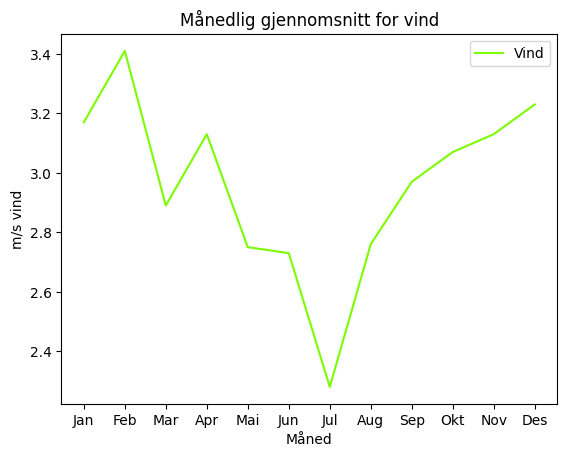

In [ ]:
# Visualiserer månedlig gjennomsnitt for vind
plt.plot(months, month_wind, label='Vind', color='lawngreen')
plt.xlabel('Måned') 
plt.ylabel('m/s vind') 
plt.title('Månedlig gjennomsnitt for vind') 
plt.legend()
plt.show()

Når det månedlige gjennomsnittet for de to værtypene visualiseres hver for seg, ser det ut som at de beveger seg litt likt. Der ser ut som at både vind og nedbør har en tydelig nedgang og så en oppgang i løpet av året. 

Når vi setter de i samme koordinatsystem ser vi derimot at nedbør har mye større endringer enn det vind har.

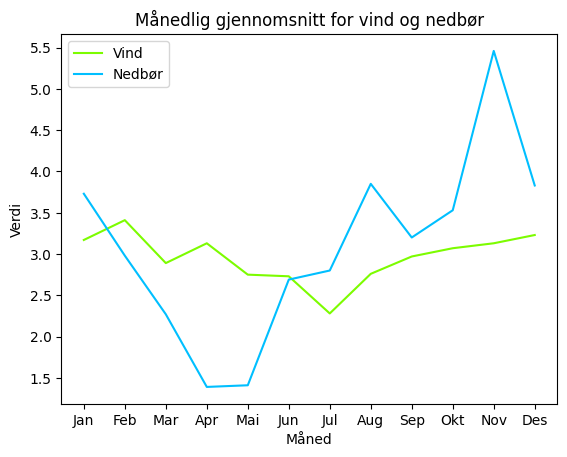

In [ ]:
# Visualiserer månedlig gjennomsnitt for vind og nedbør
plt.plot(months, month_wind, label='Vind', color='lawngreen')
plt.plot(months, month_prec, label='Nedbør', color='deepskyblue')

plt.xlabel('Måned') 
plt.ylabel('Verdi') 
plt.title('Månedlig gjennomsnitt for vind og nedbør') 
plt.legend()
plt.show()

Her er det tydlig å se at vind har vært mye mer stabil i løpet av året enn det nedbør har. Det er også tydlig å se at det er både mest vind og nedbør rundt vinter og høst. Det tyder på at de henger litt sammen. 

Derfor vil vi konkludere med at mye nedbør og mye vind henger sammen. 

#### Det er lite vind og nedbør når det er høy temperatur
Som allerede konkludert med ovenfor har både vind og nedbør en nedgang i løpet av året. Selv om disse nedgangene ikke er samtidlig, ser vi at nedgangene er på tidspunkter det vanligvis er høye temperaturer.

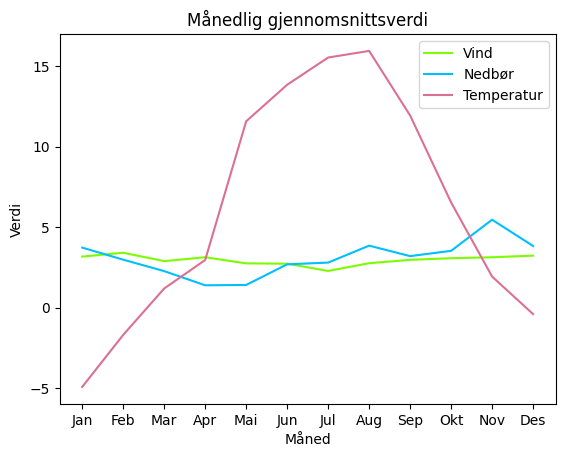

In [ ]:
# Visualiserer månedlig gjennomsnitt for vind og nedbør
plt.plot(months, month_wind, label='Vind', color='lawngreen')
plt.plot(months, month_prec, label='Nedbør', color='deepskyblue')

# Regner ut månedlig gjennomsnittsverdi for temperatur
month_temp = fc.average_other(temperature)

# Visualiserer månedlig gjennomsnitt for temperatur
plt.plot(months, month_temp, label='Temperatur', color='palevioletred')

plt.xlabel('Måned') 
plt.ylabel('Verdi') 
plt.title('Månedlig gjennomsnittsverdi') 
plt.legend()
plt.show()

Denne grafen viser at temperatur har så høye verdier i forhold til vind og nedbør at det er vanskelig å se forskjellene i vind og nedbør. 

Det går derimot ann å se her at når det er minst vind er det nesten toppen av temperaturen, men ellers er det vanskelig å se mye ut fra denne visualiseringen.

Siden det er litt vanskelig å se forskjellene har vi prøvd å bruke en annen visualasjon. 

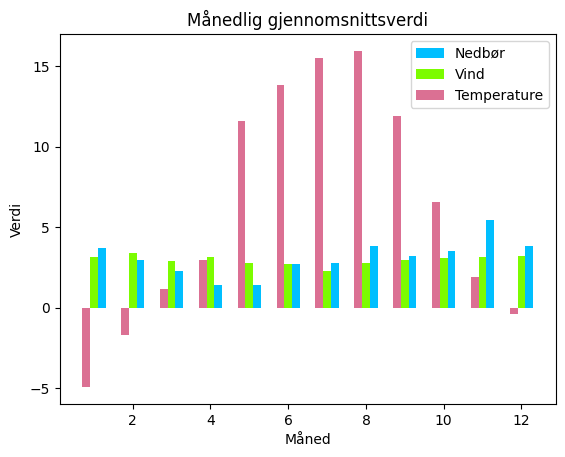

In [12]:
# Bestemmer bredden på stolpene
width = 0.2

# Lager x-verdiene
months = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

# Visualiserer gjennsomsnittsverdiene sånn at de står ved siden av hverandre
plt.bar(months+width, month_prec, label='Nedbør', width=width, color='deepskyblue')

plt.bar(months, month_wind, label='Vind', width=width, color='lawngreen')

plt.bar(months-width, month_temp, label='Temperature', width=width, color='palevioletred')

plt.bar
plt.xlabel('Måned') 
plt.ylabel('Verdi') 
plt.title('Månedlig gjennomsnittsverdi') 
plt.legend()
plt.show() 


Denne grafen gjør det lett å se at for eksempel i november har mengden nedbør økt når temperaturen har synket. Det er også lett å se at mengden nedbør synker veldig mye når temperaturen først begynner å stige. Etter de mer ekstreme endringene i temperatur virker det som at nedbøren jevner seg ut litt.

Selv om grafen viser det tydeligere er det fortsatt vanskelig å se skikkelige sammenhenger mellom alle tre værtypene i samme diagram. 

Vi konkluderer derfor med at det er tydelig å se at nedbør øker ved lavere temperaturer og synker med høye temperaturer. Vind holder seg mer stabil underveis, men når det er minst vind er det de høyeste temperaturene.

Alt i alt konkluderer vi med at de tre værtypene påvirker hverandre i ulik grad og at det er mye lettere å sammenligne vind og nedbør siden de har lignende verdier.